<a href="https://colab.research.google.com/github/Parishri07/Logistic-Regression-models/blob/main/Sentiment_analysis_of_IMDb_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [ ]:
%pip install --upgrade scikit-learn==0.23.0

  Using cached scikit-learn-0.23.0.tar.gz (7.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis dataset/Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis dataset/Test.csv')
df_valid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis dataset/Valid.csv')

In [4]:
df_train

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [5]:
df_test

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
...,...,...
4995,This is the kind of picture John Lassiter woul...,1
4996,A MUST SEE! I saw WHIPPED at a press screening...,1
4997,NBC should be ashamed. I wouldn't allow my chi...,0
4998,This movie is a clumsy mishmash of various gho...,0


In [6]:
df_valid

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0
...,...,...
4995,"Man, I loved this movie! This really takes me ...",1
4996,Recovery is an incredibly moving piece of work...,1
4997,"You can take the crook out of the joint, but i...",1
4998,FUTZ is the only show preserved from the exper...,1


In [7]:
df_train.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
df_train.isnull().sum()

text     0
label    0
dtype: int64

Histogram

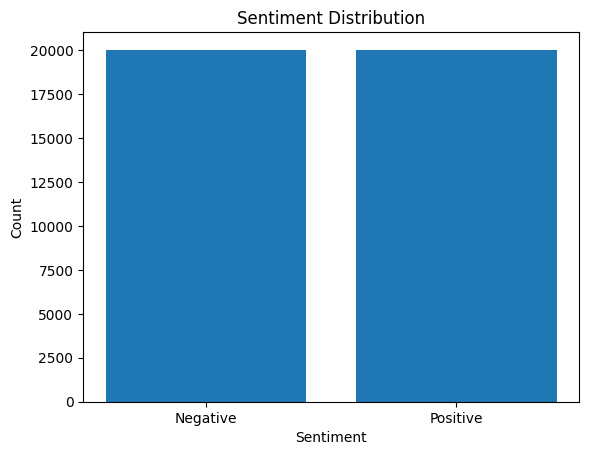

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = [0, 0]  # Initialize sentiment counts for 0 and 1

for sentiment in df_train['label']:
  sentiment_counts[sentiment] += 1

sentiment_labels = ["Negative", "Positive"]  # Map labels to sentiment values (optional)
sentiment_values = sentiment_counts

plt.bar(sentiment_labels, sentiment_values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

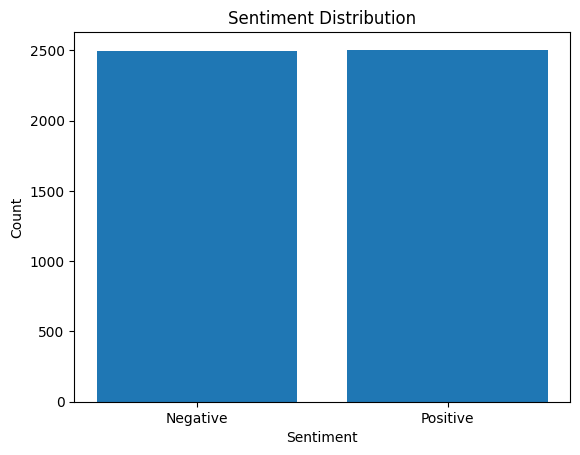

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = [0, 0]  # Initialize sentiment counts for 0 and 1

for sentiment in df_test['label']:
  sentiment_counts[sentiment] += 1

sentiment_labels = ["Negative", "Positive"]  # Map labels to sentiment values (optional)
sentiment_values = sentiment_counts

plt.bar(sentiment_labels, sentiment_values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

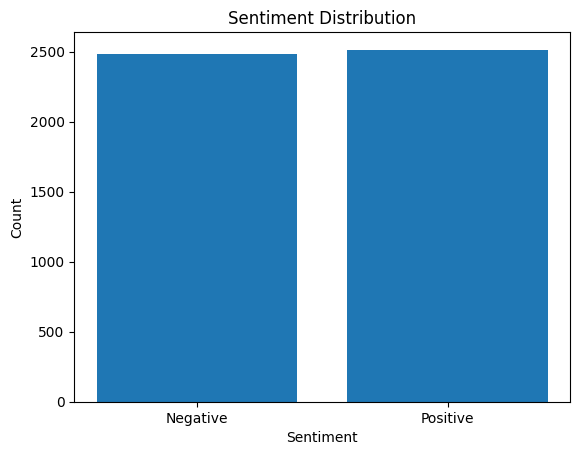

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = [0, 0]  # Initialize sentiment counts for 0 and 1

for sentiment in df_valid['label']:
  sentiment_counts[sentiment] += 1

sentiment_labels = ["Negative", "Positive"]  # Map labels to sentiment values (optional)
sentiment_values = sentiment_counts

plt.bar(sentiment_labels, sentiment_values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

Converting to Lowercase

In [7]:
df_train['text'] = df_train['text'].apply(lambda x: x.lower())
df_train

,text,label
0,i grew up (b. 1965) watching and loving the th...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1
...,...,...
39995,"""western union"" is something of a forgotten cl...",1
39996,this movie is an incredible piece of work. it ...,1
39997,my wife and i watched this movie because we pl...,0
39998,"when i first watched flatliners, i was amazed....",1


In [8]:
df_test['text'] = df_test['text'].apply(lambda x: x.lower())
df_test

,text,label
0,i always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(dir-steve ...,0
2,this movie was so poorly written and directed ...,0
3,the most interesting thing about miryang (secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
...,...,...
4995,this is the kind of picture john lassiter woul...,1
4996,a must see! i saw whipped at a press screening...,1
4997,nbc should be ashamed. i wouldn't allow my chi...,0
4998,this movie is a clumsy mishmash of various gho...,0


In [9]:
df_valid['text'] = df_valid['text'].apply(lambda x: x.lower())
df_valid

,text,label
0,it's been about 14 years since sharon stone aw...,0
1,someone needed to make a car payment... this i...,0
2,the guidelines state that a comment must conta...,0
3,this movie is a muddled mish-mash of clichés f...,0
4,before stan laurel became the smaller half of ...,0
...,...,...
4995,"man, i loved this movie! this really takes me ...",1
4996,recovery is an incredibly moving piece of work...,1
4997,"you can take the crook out of the joint, but i...",1
4998,futz is the only show preserved from the exper...,1


Making word cloud

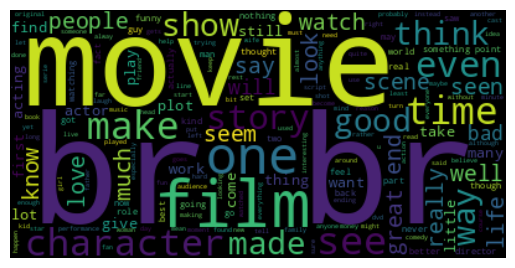

In [ ]:
from wordcloud import WordCloud

# Create and generate the word cloud
wordcloud = WordCloud().generate(df_train['text'].str.cat(sep=' '))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Removing stop words

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stop_words = stopwords.words('english')

def remove_stopwords(text):
  words = text.lower().split()  # Tokenize and lowercase
  filtered_words = [word for word in words if word not in stop_words]
  return ' '.join(filtered_words)

df_train['text'] = df_train['text'].apply(remove_stopwords)  # Apply the function to each sentence

In [12]:
df_train

,text,label
0,grew (b. 1965) watching loving thunderbirds. m...,0
1,"put movie dvd player, sat coke chips, expectat...",0
2,people know particular time past like feel nee...,0
3,"even though great interest biblical movies, bo...",0
4,im die hard dads army fan nothing ever change ...,1
...,...,...
39995,"""western union"" something forgotten classic we...",1
39996,movie incredible piece work. explores every no...,1
39997,wife watched movie plan visit sicily stromboli...,0
39998,"first watched flatliners, amazed. necessary fe...",1


In [13]:
df_test['text'] = df_test['text'].apply(remove_stopwords)
df_test

,text,label
0,always wrote series complete stink-fest jim be...,0
1,1st watched 12/7/2002 - 3 10(dir-steve purcell...,0
2,movie poorly written directed fell asleep 30 m...,0
3,interesting thing miryang (secret sunshine) ac...,1
4,"first read ""berlin meer"" expect much. thought ...",0
...,...,...
4995,"kind picture john lassiter would making today,...",1
4996,must see! saw whipped press screening hilariou...,1
4997,nbc ashamed. allow children see this. definite...,0
4998,movie clumsy mishmash various ghost-story susp...,0


In [14]:
df_valid['text'] = df_valid['text'].apply(remove_stopwords)
df_valid

,text,label
0,14 years since sharon stone awarded viewers le...,0
1,someone needed make car payment... truly awful...,0
2,guidelines state comment must contain minimum ...,0
3,movie muddled mish-mash clichés recent cinema....,0
4,stan laurel became smaller half all-time great...,0
...,...,...
4995,"man, loved movie! really takes back kid. days ...",1
4996,"recovery incredibly moving piece work, handlin...",1
4997,"take crook joint, seems exceedingly difficult ...",1
4998,futz show preserved experimental theatre movem...,1


Split into dependent and independent features

In [15]:
x_train = df_train.iloc[:,:1]
x_train

,text
0,grew (b. 1965) watching loving thunderbirds. m...
1,"put movie dvd player, sat coke chips, expectat..."
2,people know particular time past like feel nee...
3,"even though great interest biblical movies, bo..."
4,im die hard dads army fan nothing ever change ...
...,...
39995,"""western union"" something forgotten classic we..."
39996,movie incredible piece work. explores every no...
39997,wife watched movie plan visit sicily stromboli...
39998,"first watched flatliners, amazed. necessary fe..."


In [16]:
y_train = df_train.iloc[:,-1]
y_train

0        0
1        0
2        0
3        0
4        1
        ..
39995    1
39996    1
39997    0
39998    1
39999    1
Name: label, Length: 40000, dtype: int64

In [17]:
x_test = df_test.iloc[:,:1]
x_test

,text
0,always wrote series complete stink-fest jim be...
1,1st watched 12/7/2002 - 3 10(dir-steve purcell...
2,movie poorly written directed fell asleep 30 m...
3,interesting thing miryang (secret sunshine) ac...
4,"first read ""berlin meer"" expect much. thought ..."
...,...
4995,"kind picture john lassiter would making today,..."
4996,must see! saw whipped press screening hilariou...
4997,nbc ashamed. allow children see this. definite...
4998,movie clumsy mishmash various ghost-story susp...


In [18]:
y_test = df_test.iloc[:,-1]
y_test

0       0
1       0
2       0
3       1
4       0
       ..
4995    1
4996    1
4997    0
4998    0
4999    0
Name: label, Length: 5000, dtype: int64

In [19]:
x_valid = df_valid.iloc[:,:1]
x_valid

,text
0,14 years since sharon stone awarded viewers le...
1,someone needed make car payment... truly awful...
2,guidelines state comment must contain minimum ...
3,movie muddled mish-mash clichés recent cinema....
4,stan laurel became smaller half all-time great...
...,...
4995,"man, loved movie! really takes back kid. days ..."
4996,"recovery incredibly moving piece work, handlin..."
4997,"take crook joint, seems exceedingly difficult ..."
4998,futz show preserved experimental theatre movem...


In [20]:
y_valid = df_valid.iloc[:,-1]
y_valid

0       0
1       0
2       0
3       0
4       0
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: label, Length: 5000, dtype: int64

Removing numbers

In [21]:
pattern = r"\d+"
x_train.loc[:,'text'] = x_train.loc[:,'text'].str.replace(pattern, '', regex=True)
x_train['text']

0        grew (b. ) watching loving thunderbirds. mates...
1        put movie dvd player, sat coke chips, expectat...
2        people know particular time past like feel nee...
3        even though great interest biblical movies, bo...
4        im die hard dads army fan nothing ever change ...
                               ...                        
39995    "western union" something forgotten classic we...
39996    movie incredible piece work. explores every no...
39997    wife watched movie plan visit sicily stromboli...
39998    first watched flatliners, amazed. necessary fe...
39999    would film good, gross estimated $,, award nom...
Name: text, Length: 40000, dtype: object

In [22]:
x_test.loc[:,'text'] = x_test.loc[:,'text'].str.replace(pattern, '', regex=True)
x_test['text']

0       always wrote series complete stink-fest jim be...
1       st watched // -  (dir-steve purcell): typical ...
2       movie poorly written directed fell asleep  min...
3       interesting thing miryang (secret sunshine) ac...
4       first read "berlin meer" expect much. thought ...
                              ...                        
4995    kind picture john lassiter would making today,...
4996    must see! saw whipped press screening hilariou...
4997    nbc ashamed. allow children see this. definite...
4998    movie clumsy mishmash various ghost-story susp...
4999    formula movie illegitimate son rich chilenian ...
Name: text, Length: 5000, dtype: object

In [23]:
x_valid.loc[:,'text'] = x_valid.loc[:,'text'].str.replace(pattern, '', regex=True)
x_valid['text']

0        years since sharon stone awarded viewers leg-...
1       someone needed make car payment... truly awful...
2       guidelines state comment must contain minimum ...
3       movie muddled mish-mash clichés recent cinema....
4       stan laurel became smaller half all-time great...
                              ...                        
4995    man, loved movie! really takes back kid. days ...
4996    recovery incredibly moving piece work, handlin...
4997    take crook joint, seems exceedingly difficult ...
4998    futz show preserved experimental theatre movem...
4999    "the mother" tells recently widowed mid-'s mot...
Name: text, Length: 5000, dtype: object

Removing special characters

In [24]:
x_train.loc[:,'text'] = x_train.loc[:,'text'].str.replace(r"[^\w\s]", '', regex=True)
x_train.loc[:,'text'] = x_train.loc[:,'text'].str.strip()
x_train['text']

0        grew b  watching loving thunderbirds mates sch...
1        put movie dvd player sat coke chips expectatio...
2        people know particular time past like feel nee...
3        even though great interest biblical movies bor...
4        im die hard dads army fan nothing ever change ...
                               ...                        
39995    western union something forgotten classic west...
39996    movie incredible piece work explores every noo...
39997    wife watched movie plan visit sicily stromboli...
39998    first watched flatliners amazed necessary feat...
39999    would film good gross estimated  award nominat...
Name: text, Length: 40000, dtype: object

In [25]:
x_test.loc[:,'text'] = x_test.loc[:,'text'].str.replace(r"[^\w\s]", '', regex=True)
x_test.loc[:,'text'] = x_test.loc[:,'text'].str.strip()
x_test['text']

0       always wrote series complete stinkfest jim bel...
1       st watched    dirsteve purcell typical mary ka...
2       movie poorly written directed fell asleep  min...
3       interesting thing miryang secret sunshine acto...
4       first read berlin meer expect much thought rig...
                              ...                        
4995    kind picture john lassiter would making today ...
4996    must see saw whipped press screening hilarious...
4997    nbc ashamed allow children see this definitely...
4998    movie clumsy mishmash various ghoststory suspe...
4999    formula movie illegitimate son rich chilenian ...
Name: text, Length: 5000, dtype: object

In [26]:
x_valid.loc[:,'text'] = x_valid.loc[:,'text'].str.replace(r"[^\w\s]", '', regex=True)
x_valid.loc[:,'text'] = x_valid.loc[:,'text'].str.strip()
x_valid['text']

0       years since sharon stone awarded viewers legcr...
1       someone needed make car payment truly awful ma...
2       guidelines state comment must contain minimum ...
3       movie muddled mishmash clichés recent cinema p...
4       stan laurel became smaller half alltime greate...
                              ...                        
4995    man loved movie really takes back kid days tea...
4996    recovery incredibly moving piece work handling...
4997    take crook joint seems exceedingly difficult t...
4998    futz show preserved experimental theatre movem...
4999    the mother tells recently widowed mids mother ...
Name: text, Length: 5000, dtype: object

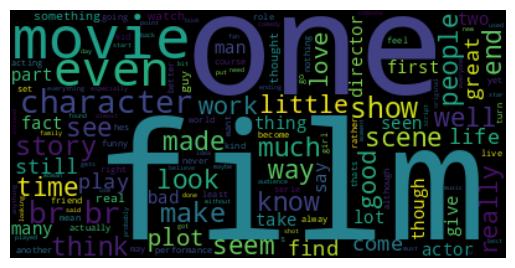

In [ ]:
from wordcloud import WordCloud

text = x_train['text'].str.cat(sep=' ')
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# Bag of words model

vectorizer.fit(x_train['text'])
# This process involves building a vocabulary of unique words encountered in the training data.

train_features = vectorizer.transform(x_train['text'])
test_features = vectorizer.transform(x_test['text'])
valid_features = vectorizer.transform(x_valid['text'])
# This transformation creates a document-term matrix, where rows represent documents (text samples) and columns represent unique words.
# The values in the matrix indicate how many times each word appears in each document.

# The value at a specific row i and column j represents the numerical feature for that word in that document.
# The BoW model transforms each document in the corpus into a numerical feature vector. This vector has the same length as the vocabulary size.

In [28]:
print("Feature Names:", vectorizer.get_feature_names_out())

Feature Names: ['__' '____' '_____' ... 'þór' 'יגאל' 'כרמון']


cant understand feature names

In [29]:
feature_names = vectorizer.get_feature_names_out()
n = feature_names.size
placeholder_index = n-1  # Assuming this is the index of '____'
actual_word = feature_names[placeholder_index]
print(f"The word represented by '____' is: {actual_word}")

The word represented by '____' is: כרמון


Standarising the data

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
train_features = scaler.fit_transform(train_features)
valid_features = scaler.transform(valid_features)
test_features = scaler.transform(test_features)

In [31]:
train_features

<40000x155793 sparse matrix of type '<class 'numpy.float64'>'
	with 4105659 stored elements in Compressed Sparse Row format>

**Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
hyperparameter_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}

best_accuracy = 0
best_params = None

for C in hyperparameter_grid['C']:
    for solver in hyperparameter_grid['solver']:
        model = LogisticRegression(C=C, solver=solver, max_iter=1000)
        model.fit(train_features, y_train)

        # Make predictions on validation set
        predictions = model.predict(valid_features)

        # Evaluate model performance on validation set
        accuracy = accuracy_score(y_valid, predictions)
        f1 = f1_score(y_valid, predictions)

        # Track best hyperparameters based on validation performance
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'C': C, 'solver': solver}

# Train the final model with best hyperparameters
final_model = LogisticRegression(**best_params)
final_model.fit(train_features, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [35]:
best_accuracy

0.874

In [36]:
best_params

{'C': 0.01, 'solver': 'liblinear'}

In [37]:
# Make predictions on the test set using the final model
predictions = final_model.predict(test_features)

# Evaluate model performance on the test set using appropriate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy on Test Set:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# focus on recall - False Negative
# where actally the review is good but it is predicting as bad

Accuracy on Test Set: 0.8756
Precision: 0.8687818253035644
Recall: 0.8854291417165668
F1-Score: 0.8770264926848558


**Naive Baye's Algorithm**

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_features, y_train)

best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Model Parameters:", best_model.get_params())
print("Best Cross-Validation Accuracy:", best_score)

Best Model Parameters: {'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}
Best Cross-Validation Accuracy: 0.7351500000000001


In [36]:
best_model

MultinomialNB()

In [37]:
y_pred = best_model.predict(test_features)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7268
Precision: 0.7291750503018108
Recall: 0.7233532934131737
F1-score: 0.72625250501002


**Naive Baye's v/s Logistic Regression**

If you have a large dataset and computational power isn't a concern, Logistic Regression might be a good choice for potentially higher accuracy.

If understanding the influence of specific words is important, Logistic Regression's interpretability can be valuable.

For quick analysis or limited resources, Naive Bayes' simplicity and speed make it a good option.

check other algo like Support Vector machine



